In [8]:
%matplotlib inline
import sys
import numpy as np
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# SIFT - a demo

The objective of this activity is to critically analyse the results you obtain by running the code and learn about the potential of SIFT descriptors for feature matching


## 1. SIFT computation and visualization

We'll try out with an intensity image first


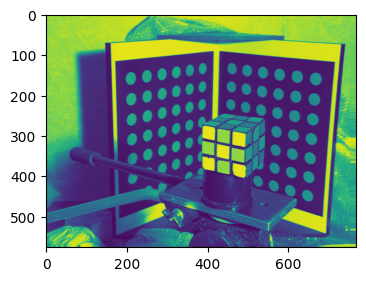

In [9]:
img = cv.imread('images/Rubik1.pgm')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img_sift = None

fig = plt.figure(figsize=(4, 6))
plt.imshow(gray)

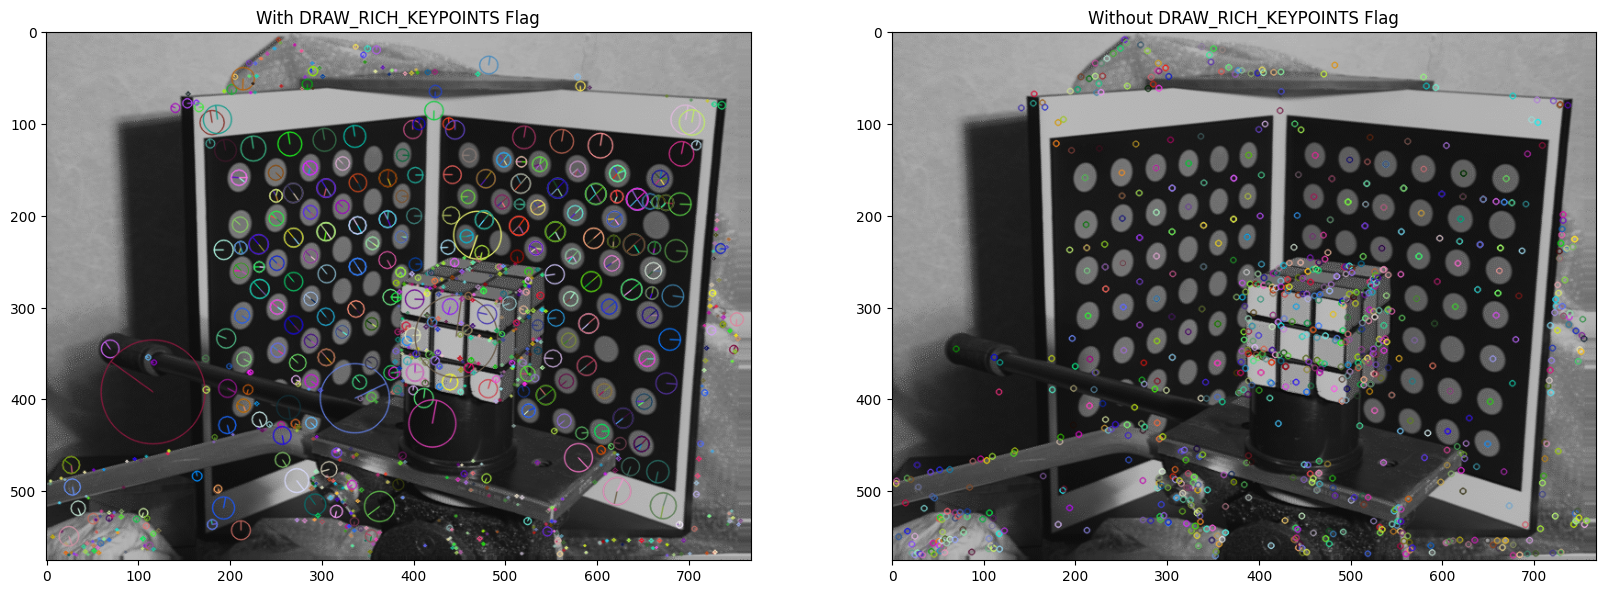

In [10]:
sift = cv.SIFT_create()
kp = sift.detect(gray,None)

img_sift_with_flag = cv.drawKeypoints(gray, kp, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) #showing the keypoints with flag
cv.imwrite('sift_keypoints_with_flag.jpg', img_sift_with_flag)  #saving the image

img_sift_without_flag = cv.drawKeypoints(gray, kp, None) #showing the keypoints without flag
cv.imwrite('sift_keypoints_without_flag.jpg', img_sift_without_flag)

fig = plt.figure(figsize=(20, 10)) 
fig.add_subplot(1, 2, 1)
plt.title('With DRAW_RICH_KEYPOINTS Flag')
plt.imshow(cv.cvtColor(img_sift_with_flag, cv.COLOR_BGR2RGB))

fig.add_subplot(1, 2, 2)
plt.title('Without DRAW_RICH_KEYPOINTS Flag')
plt.imshow(cv.cvtColor(img_sift_without_flag, cv.COLOR_BGR2RGB))

plt.show()

the function drawKeypoints with flag, will show the KPs with size and orientations, else they will be shown like they are the same.

What SIFT detects in the image:

* Corners & edges of the Cube
* Dots in the background pattern
* Edges of the stand/platform


Possible false features:

* Too many points in the background dots
* Some large circles might be unnecessary
* Noise in smooth areas

We try now with a color image. Notice that OpenCV uses BGR as a default color space, while the visualization functions don't (thus we need to convert BGR2RGB)

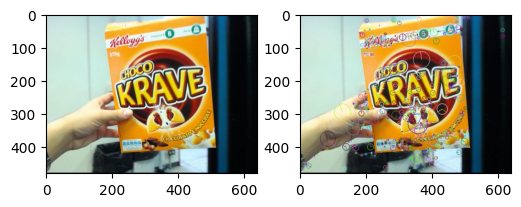

In [ ]:
image_path = 'Imageset/BackgroundChange/09601.jpg'
img = cv.imread(image_path)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  # cv has BGR format

img_sift = None

sift = cv.SIFT_create()
kp = sift.detect(gray,None) # none means no mask, so sift will detect keypoints in the whole image
img_sift=cv.drawKeypoints(img,kp,img_sift, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 

fig = plt.figure(figsize=(6, 8)) 
fig.add_subplot(1,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

fig.add_subplot(1,2,2)
plt.imshow(cv.cvtColor(img_sift, cv.COLOR_BGR2RGB))


## 2. Image matching with SIFT features

We now compute matches between SIFT features from an image pair. In the example we notice a background, illumination and scale change

### 2.1 Detection first

In [ ]:
img1 = cv.imread('Imageset/BackgroundChange/11201.jpg')
img2 = cv.imread('Imageset/BackgroundChange/18301.jpg')

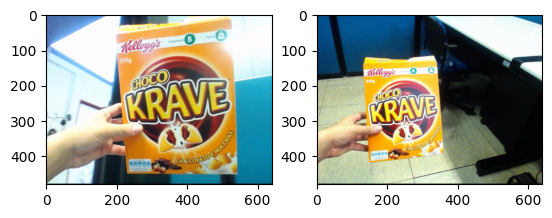

In [23]:
# Parallel display of images
fig = plt.figure() 
fig.add_subplot(1,2,1)
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
fig.add_subplot(1,2,2)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))

In [ ]:
sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)# to detect keypoints and compute their descriptors
kp2, des2 = sift.detectAndCompute(img2,None)

img1_with_kp = None
img2_with_kp = None
img1_with_kp = cv.drawKeypoints(img1,kp1,img1_with_kp)
img2_with_kp = cv.drawKeypoints(img2,kp2,img2_with_kp)

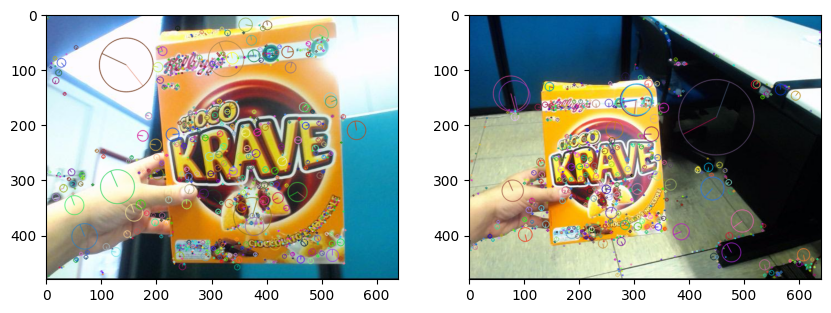

In [27]:
img1_with_kp=cv.drawKeypoints(img1,kp1,img1_with_kp,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_with_kp=cv.drawKeypoints(img2,kp2,img2_with_kp,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10, 20))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img1_with_kp, cv.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(img2_with_kp, cv.COLOR_BGR2RGB))


### 2.2 Matching
The  following feature matching will follow two steps:
1. Brute force matching
2. Lowe's filtering 

Brute force matching is a simple: take the featue description of each feature in one image and calculate its distance from every feature in the other image. 
Lowe filtering is a thresholding technique to eliminate matches with high distances. 

In [28]:
# BFMatcher with default params
bf = cv.BFMatcher()

In [29]:
# Testing the top two best matches to increase matching accuracy
matches = bf.knnMatch(des1,des2, k=2)

In [31]:
# Store all the good matches as per Lowe's ratio test
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append([m])

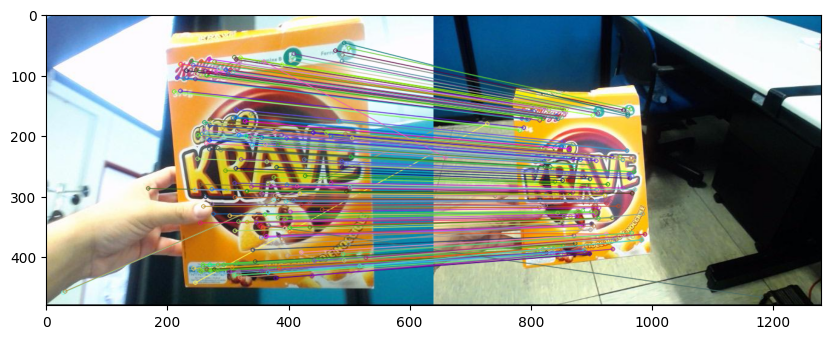

In [33]:
img3 = None
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,img3,flags=2)
plt.figure(figsize=(10, 20))
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))

Try the above with other images pairs from the sets provided. In particular, try image pairs from  
1. Imageset/2DMovement 
2. Imageset/ColorChanges
3. Imageset/Random

Observe the success and failure of the two methods against different types of variations. 

<b> ADD YOUR COMMENTS HERE </b>

## 3D movement

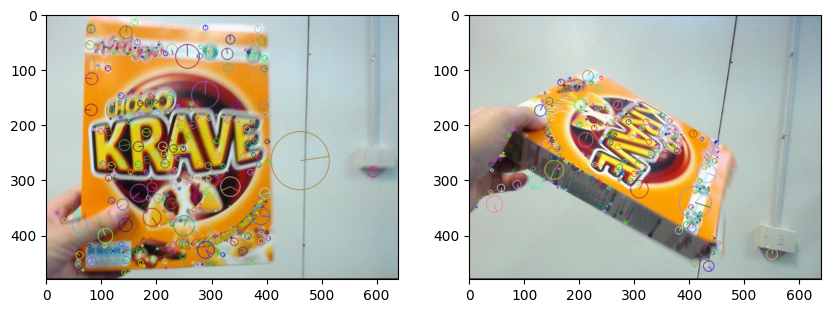

In [ ]:
img1 = cv.imread('Imageset/3Dmovements/05401.jpg')
img2 = cv.imread('Imageset/3Dmovements/18301.jpg')

sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

img1_with_kp = None
img2_with_kp = None
img1_with_kp = cv.drawKeypoints(img1,kp1,img1_with_kp)
img2_with_kp = cv.drawKeypoints(img2,kp2,img2_with_kp)
img1_with_kp=cv.drawKeypoints(img1,kp1,img1_with_kp,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_with_kp=cv.drawKeypoints(img2,kp2,img2_with_kp,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10, 20))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img1_with_kp, cv.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(img2_with_kp, cv.COLOR_BGR2RGB))


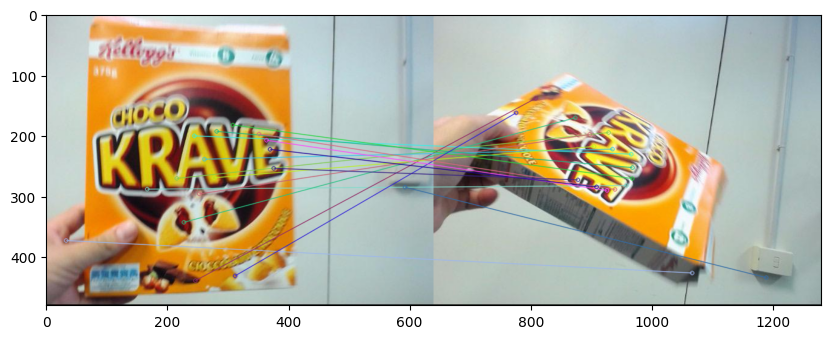

In [ ]:
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append([m])

img3 = None
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,img3,flags=2)
plt.figure(figsize=(10, 20))
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))

## Occlusion

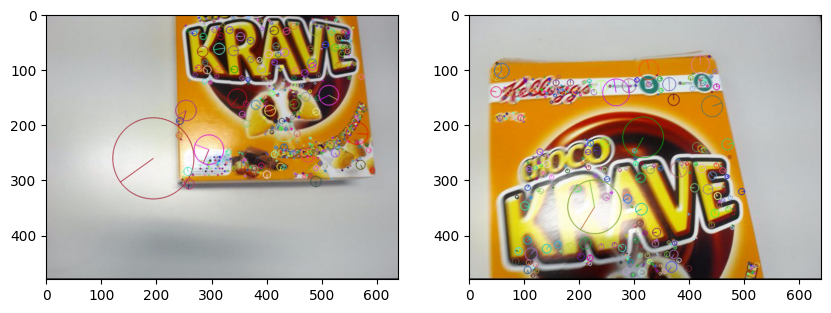

In [ ]:
img1 = cv.imread('Imageset/Occlusion/31101.jpg')
img2 = cv.imread('Imageset/Occlusion/33501.jpg')

sift = cv.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

img1_with_kp = None
img2_with_kp = None
img1_with_kp = cv.drawKeypoints(img1,kp1,img1_with_kp)
img2_with_kp = cv.drawKeypoints(img2,kp2,img2_with_kp)
img1_with_kp=cv.drawKeypoints(img1,kp1,img1_with_kp,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_with_kp=cv.drawKeypoints(img2,kp2,img2_with_kp,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10, 20))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img1_with_kp, cv.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(img2_with_kp, cv.COLOR_BGR2RGB))


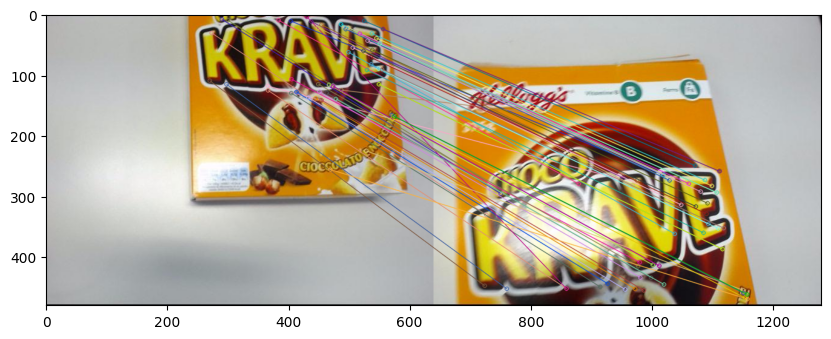

In [38]:
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append([m])

img3 = None
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,img3,flags=2)
plt.figure(figsize=(10, 20))
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))